In [1]:
from pyspark.sql.types import * 
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext.getOrCreate();

spark = SparkSession(sc)

unsw_nb15 = StructType([
    StructField("srcip",StringType(),True),
    StructField("sport",IntegerType(),True),
    StructField("dstip",StringType(),True),
    StructField("dsport",IntegerType(),True),
    StructField("proto",StringType(),True),
    StructField("state",StringType(),True),
    StructField("dur",FloatType(),True),
    StructField("sbytes",IntegerType(),True),
    StructField("dbytes",IntegerType(),True),
    StructField("sttl",IntegerType(),True),
    StructField("dttl",IntegerType(),True),
    StructField("sloss",IntegerType(),True),
    StructField("dloss",IntegerType(),True),
    StructField("service",StringType(),True),
    StructField("Sload",FloatType(),True),
    StructField("Dload",FloatType(),True),
    StructField("Spkts",IntegerType(),True),
    StructField("Dpkts",IntegerType(),True),
    StructField("swin",IntegerType(),True),
    StructField("dwin",IntegerType(),True),
    StructField("stcpb",IntegerType(),True),
    StructField("dtcpb",IntegerType(),True),
    StructField("smeansz",IntegerType(),True),
    StructField("dmeansz",IntegerType(),True),
    StructField("trans_depth",IntegerType(),True),
    StructField("res_bdy_len",IntegerType(),True),
    StructField("Sjit",FloatType(),True),
    StructField("Djit",FloatType(),True),
    StructField("Stime",TimestampType(),True),
    StructField("Ltime",TimestampType(),True),
    StructField("Sintpkt",FloatType(),True),
    StructField("Dintpkt",FloatType(),True),
    StructField("tcprtt",FloatType(),True),
    StructField("synack",FloatType(),True),
    StructField("ackdat",FloatType(),True),
    StructField("is_sm_ips_ports",IntegerType(),True),
    StructField("ct_state_ttl",IntegerType(),True),
    StructField("ct_flw_http_mthd",IntegerType(),True),
    StructField("is_ftp_login",IntegerType(),True),
    StructField("ct_ftp_cmd",IntegerType(),True),
    StructField("ct_srv_src",IntegerType(),True),
    StructField("ct_srv_dst",IntegerType(),True),
    StructField("ct_dst_ltm",IntegerType(),True),
    StructField("ct_src_ltm",IntegerType(),True),
    StructField("ct_src_dport_ltm",IntegerType(),True),
    StructField("ct_dst_sport_ltm",IntegerType(),True),
    StructField("ct_dst_src_ltm",IntegerType(),True),
    StructField("attack_cat",StringType(),True),
    StructField("Label",IntegerType(),True)
])

unsw_nb15_df = spark.read.schema(unsw_nb15).format("csv").load("hdfs://localhost:9000/DataAnalysis/UNSW-NB15.csv").toDF("srcip","sport","dstip","dsport","proto","state","dur","sbytes","dbytes","sttl",
     "dttl","sloss","dloss","service","Sload","Dload","Spkts","Dpkts","swin","dwin",
     "stcpb","dtcpb","smeansz","dmeansz","trans_depth","res_bdy_len","Sjit","Djit",
     "Stime","Ltime","Sintpkt","Dintpkt","tcprtt","synack","ackdat","is_sm_ips_ports",
     "ct_state_ttl","ct_flw_http_mthd","is_ftp_login","ct_ftp_cmd","ct_srv_src",
     "ct_srv_dst","ct_dst_ltm","ct_src_ltm","ct_src_dport_ltm","ct_dst_sport_ltm",
     "ct_dst_src_ltm","attack_cat","Label")


24/05/04 23:57:01 WARN Utils: Your hostname, bunmialex-virtual-machine resolves to a loopback address: 127.0.1.1; using 192.168.23.128 instead (on interface ens33)
24/05/04 23:57:01 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/04 23:57:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/04 23:57:04 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
from pyspark.sql.functions import col

In [3]:
from pyspark.sql.functions import when

In [4]:
default_string = "Normal"
filled_df = unsw_nb15_df.withColumn("attack_cat", when(unsw_nb15_df["attack_cat"].isNull(), default_string).otherwise(unsw_nb15_df["attack_cat"]))

In [5]:
null_counts = [(col_name, filled_df.filter(col(col_name).isNull()).count()) for col_name in filled_df.columns]

In [6]:
null_counts

[('srcip', 0),
 ('sport', 0),
 ('dstip', 0),
 ('dsport', 0),
 ('proto', 0),
 ('state', 0),
 ('dur', 0),
 ('sbytes', 0),
 ('dbytes', 0),
 ('sttl', 0),
 ('dttl', 0),
 ('sloss', 0),
 ('dloss', 0),
 ('service', 0),
 ('Sload', 0),
 ('Dload', 0),
 ('Spkts', 0),
 ('Dpkts', 0),
 ('swin', 0),
 ('dwin', 0),
 ('stcpb', 745798),
 ('dtcpb', 746426),
 ('smeansz', 0),
 ('dmeansz', 0),
 ('trans_depth', 0),
 ('res_bdy_len', 0),
 ('Sjit', 0),
 ('Djit', 0),
 ('Stime', 2539739),
 ('Ltime', 2539739),
 ('Sintpkt', 0),
 ('Dintpkt', 0),
 ('tcprtt', 0),
 ('synack', 0),
 ('ackdat', 0),
 ('is_sm_ips_ports', 0),
 ('ct_state_ttl', 0),
 ('ct_flw_http_mthd', 0),
 ('is_ftp_login', 0),
 ('ct_ftp_cmd', 0),
 ('ct_srv_src', 0),
 ('ct_srv_dst', 0),
 ('ct_dst_ltm', 0),
 ('ct_src_ltm', 0),
 ('ct_src_dport_ltm', 0),
 ('ct_dst_sport_ltm', 0),
 ('ct_dst_src_ltm', 0),
 ('attack_cat', 0),
 ('Label', 0)]

In [7]:
columns_to_drop = ["srcip","dstip","stcpb", "dtcpb", "Stime","Ltime"]
cleaned_df = filled_df.drop(*columns_to_drop)

In [66]:
sep_cleaned_dfCols = cleaned_df.columns

In [67]:
sep_cleaned_dfCols.remove("attack_cat")

In [8]:
cleaned_df.show()

24/05/05 00:03:20 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-----+------+-----+-----+--------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+-------+-------+-----------+-----------+---------+---------+---------+---------+-------+-------+-------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|sport|dsport|proto|state|     dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|     Djit|  Sintpkt|  Dintpkt| tcprtt| synack| ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|
+-----+------+-----+-----+--------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+-------+-------+-----------+-----------+---------+---------+----

In [79]:
cleaned_df.createOrReplaceTempView("cleaned_df_table")

In [80]:
selected_df = spark.sql("SELECT * FROM cleaned_df_table WHERE service != '-'")

In [81]:
selected_df.show()

+-----+------+-----+-----+---------+------+-------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+-------+-------+-----------+-----------+---------+---------+---------+---------+--------+--------+--------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|sport|dsport|proto|state|      dur|sbytes| dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|     Djit|  Sintpkt|  Dintpkt|  tcprtt|  synack|  ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|
+-----+------+-----+-----+---------+------+-------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+-------+-------+-----------+-----------+---------+--

In [82]:
null_counts = [(col_name, cleaned_df.filter(col(col_name).isNull()).count()) for col_name in cleaned_df.columns]

In [83]:
null_counts

[('sport', 0),
 ('dsport', 0),
 ('proto', 0),
 ('state', 0),
 ('dur', 0),
 ('sbytes', 0),
 ('dbytes', 0),
 ('sttl', 0),
 ('dttl', 0),
 ('sloss', 0),
 ('dloss', 0),
 ('service', 0),
 ('Sload', 0),
 ('Dload', 0),
 ('Spkts', 0),
 ('Dpkts', 0),
 ('swin', 0),
 ('dwin', 0),
 ('smeansz', 0),
 ('dmeansz', 0),
 ('trans_depth', 0),
 ('res_bdy_len', 0),
 ('Sjit', 0),
 ('Djit', 0),
 ('Sintpkt', 0),
 ('Dintpkt', 0),
 ('tcprtt', 0),
 ('synack', 0),
 ('ackdat', 0),
 ('is_sm_ips_ports', 0),
 ('ct_state_ttl', 0),
 ('ct_flw_http_mthd', 0),
 ('is_ftp_login', 0),
 ('ct_ftp_cmd', 0),
 ('ct_srv_src', 0),
 ('ct_srv_dst', 0),
 ('ct_dst_ltm', 0),
 ('ct_src_ltm', 0),
 ('ct_src_dport_ltm', 0),
 ('ct_dst_sport_ltm', 0),
 ('ct_dst_src_ltm', 0),
 ('attack_cat', 0),
 ('Label', 0)]

In [84]:
print((cleaned_df.count(),len(cleaned_df.columns)))

(2539739, 43)


In [85]:
cleaned_df.printSchema()

root
 |-- sport: integer (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: float (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: float (nullable = true)
 |-- Dload: float (nullable = true)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_len: integer (nullable = true)
 |-- Sjit: float (nullable = true)
 |-- Djit: float (nullable = true)
 |-- Sintpkt: float (nullable = true)
 |-- Dintpkt: float (nullable = true)
 |-- tc

In [9]:
cleaned_df.dtypes

[('sport', 'int'),
 ('dsport', 'int'),
 ('proto', 'string'),
 ('state', 'string'),
 ('dur', 'float'),
 ('sbytes', 'int'),
 ('dbytes', 'int'),
 ('sttl', 'int'),
 ('dttl', 'int'),
 ('sloss', 'int'),
 ('dloss', 'int'),
 ('service', 'string'),
 ('Sload', 'float'),
 ('Dload', 'float'),
 ('Spkts', 'int'),
 ('Dpkts', 'int'),
 ('swin', 'int'),
 ('dwin', 'int'),
 ('smeansz', 'int'),
 ('dmeansz', 'int'),
 ('trans_depth', 'int'),
 ('res_bdy_len', 'int'),
 ('Sjit', 'float'),
 ('Djit', 'float'),
 ('Sintpkt', 'float'),
 ('Dintpkt', 'float'),
 ('tcprtt', 'float'),
 ('synack', 'float'),
 ('ackdat', 'float'),
 ('is_sm_ips_ports', 'int'),
 ('ct_state_ttl', 'int'),
 ('ct_flw_http_mthd', 'int'),
 ('is_ftp_login', 'int'),
 ('ct_ftp_cmd', 'int'),
 ('ct_srv_src', 'int'),
 ('ct_srv_dst', 'int'),
 ('ct_dst_ltm', 'int'),
 ('ct_src_ltm', 'int'),
 ('ct_src_dport_ltm', 'int'),
 ('ct_dst_sport_ltm', 'int'),
 ('ct_dst_src_ltm', 'int'),
 ('attack_cat', 'string'),
 ('Label', 'int')]

In [10]:
cleaned_df = cleaned_df.drop("dstip")

In [11]:
cleaned_df.dtypes

[('sport', 'int'),
 ('dsport', 'int'),
 ('proto', 'string'),
 ('state', 'string'),
 ('dur', 'float'),
 ('sbytes', 'int'),
 ('dbytes', 'int'),
 ('sttl', 'int'),
 ('dttl', 'int'),
 ('sloss', 'int'),
 ('dloss', 'int'),
 ('service', 'string'),
 ('Sload', 'float'),
 ('Dload', 'float'),
 ('Spkts', 'int'),
 ('Dpkts', 'int'),
 ('swin', 'int'),
 ('dwin', 'int'),
 ('smeansz', 'int'),
 ('dmeansz', 'int'),
 ('trans_depth', 'int'),
 ('res_bdy_len', 'int'),
 ('Sjit', 'float'),
 ('Djit', 'float'),
 ('Sintpkt', 'float'),
 ('Dintpkt', 'float'),
 ('tcprtt', 'float'),
 ('synack', 'float'),
 ('ackdat', 'float'),
 ('is_sm_ips_ports', 'int'),
 ('ct_state_ttl', 'int'),
 ('ct_flw_http_mthd', 'int'),
 ('is_ftp_login', 'int'),
 ('ct_ftp_cmd', 'int'),
 ('ct_srv_src', 'int'),
 ('ct_srv_dst', 'int'),
 ('ct_dst_ltm', 'int'),
 ('ct_src_ltm', 'int'),
 ('ct_src_dport_ltm', 'int'),
 ('ct_dst_sport_ltm', 'int'),
 ('ct_dst_src_ltm', 'int'),
 ('attack_cat', 'string'),
 ('Label', 'int')]

In [12]:
cleaned_df.groupBy('Proto').count().show()
print()
cleaned_df.groupBy('state').count().show()
print()
cleaned_df.groupBy('service').count().show()
print()
cleaned_df.groupBy('attack_cat').count().show()
print()

+----------+-----+
|     Proto|count|
+----------+-----+
|      cphb|  137|
|      larp|  137|
|nsfnet-igp|  137|
|       dgp|  137|
|       tcf|  137|
|     crudp|  137|
|      vrrp|  137|
|       igp|  137|
|       nvp|  137|
|   mfe-nsp|  137|
|        il|  137|
|       prm|  137|
|      micp|  137|
|  wb-expak|  137|
|      ospf| 7798|
|br-sat-mon|  137|
|      idrp|  137|
|        ib|  137|
| kryptolan|  137|
|sprite-rpc|  137|
+----------+-----+
only showing top 20 rows




+-----+-------+
|state|  count|
+-----+-------+
|  URN|      7|
|  ACC|     43|
|  ECO|     96|
|  ECR|      8|
|  PAR|     26|
|  RST|    528|
|  REQ|   9043|
|  FIN|1478689|
|  INT| 490469|
|  MAS|      7|
|   no|      7|
|  CON| 560588|
|  TST|      8|
|  TXD|      5|
|  URH|     54|
|  CLO|    161|
+-----+-------+




+--------+-------+
| service|  count|
+--------+-------+
|     ftp|  49090|
|ftp-data| 125783|
|     dns| 781668|
|    smtp|  81645|
|    http| 206273|
|  radius|     40|
|     ssl|    142|
|       -|1246089|
|     irc|     31|
|    dhcp|    172|
|    snmp|    113|
|    pop3|   1533|
|     ssh|  47160|
+--------+-------+




+---------------+-------+
|     attack_cat|  count|
+---------------+-------+
|          Worms|    174|
|       Analysis|   2677|
|     Shellcode |   1288|
|            DoS|  16353|
|Reconnaissance |  12228|
|       Backdoor|   1795|
|       Fuzzers |  19195|
|       Exploits|  44525|
|         Normal|2218456|
|        Generic| 215481|
|      Shellcode|    223|
|      Backdoors|    534|
|        Fuzzers|   5051|
| Reconnaissance|   1759|
+---------------+-------+




In [69]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder

In [70]:
SI_proto = StringIndexer(inputCol='proto',outputCol='proto_Index')
SI_state = StringIndexer(inputCol='state',outputCol='state_Index')
SI_service = StringIndexer(inputCol='service',outputCol='service_Index')
SI_attack_cat = StringIndexer(inputCol='attack_cat',outputCol='attack_cat_Index')

In [71]:
cleaned_df = SI_proto.fit(cleaned_df).transform(cleaned_df)
cleaned_df = SI_state.fit(cleaned_df).transform(cleaned_df)
cleaned_df = SI_service.fit(cleaned_df).transform(cleaned_df)
cleaned_df = SI_attack_cat.fit(cleaned_df).transform(cleaned_df)

IllegalArgumentException: requirement failed: Output column proto_Index already exists.

In [16]:
cleaned_df.select('proto','proto_Index','state','state_Index','service','service_Index','attack_cat','attack_cat_Index').show()

+-----+-----------+-----+-----------+--------+-------------+----------+----------------+
|proto|proto_Index|state|state_Index| service|service_Index|attack_cat|attack_cat_Index|
+-----+-----------+-----+-----------+--------+-------------+----------+----------------+
|  tcp|        0.0|  FIN|        0.0|       -|          0.0|    Normal|             0.0|
|  tcp|        0.0|  FIN|        0.0|       -|          0.0|    Normal|             0.0|
|  tcp|        0.0|  FIN|        0.0|       -|          0.0|    Normal|             0.0|
|  tcp|        0.0|  FIN|        0.0|       -|          0.0|    Normal|             0.0|
|  tcp|        0.0|  FIN|        0.0|       -|          0.0|    Normal|             0.0|
|  tcp|        0.0|  FIN|        0.0|       -|          0.0|    Normal|             0.0|
|  udp|        1.0|  CON|        1.0|     dns|          1.0|    Normal|             0.0|
|  tcp|        0.0|  FIN|        0.0|ftp-data|          3.0|    Normal|             0.0|
|  udp|        1.0|  

In [17]:
OHE = OneHotEncoder(inputCols=['proto_Index','state_Index','service_Index','attack_cat_Index'],outputCols=['proto_OHE','state_OHE','service_OHE','attack_cat_OHE'])

In [18]:
cleaned_df = OHE.fit(cleaned_df).transform(cleaned_df)

In [19]:
cleaned_df.select('proto','proto_Index','proto_OHE','state','state_Index','state_OHE','attack_cat','attack_cat_Index','attack_cat_OHE').show(10)

+-----+-----------+---------------+-----+-----------+--------------+----------+----------------+--------------+
|proto|proto_Index|      proto_OHE|state|state_Index|     state_OHE|attack_cat|attack_cat_Index|attack_cat_OHE|
+-----+-----------+---------------+-----+-----------+--------------+----------+----------------+--------------+
|  tcp|        0.0|(133,[0],[1.0])|  FIN|        0.0|(15,[0],[1.0])|    Normal|             0.0|(13,[0],[1.0])|
|  tcp|        0.0|(133,[0],[1.0])|  FIN|        0.0|(15,[0],[1.0])|    Normal|             0.0|(13,[0],[1.0])|
|  tcp|        0.0|(133,[0],[1.0])|  FIN|        0.0|(15,[0],[1.0])|    Normal|             0.0|(13,[0],[1.0])|
|  tcp|        0.0|(133,[0],[1.0])|  FIN|        0.0|(15,[0],[1.0])|    Normal|             0.0|(13,[0],[1.0])|
|  tcp|        0.0|(133,[0],[1.0])|  FIN|        0.0|(15,[0],[1.0])|    Normal|             0.0|(13,[0],[1.0])|
|  tcp|        0.0|(133,[0],[1.0])|  FIN|        0.0|(15,[0],[1.0])|    Normal|             0.0|(13,[0],

In [100]:
cleaned_df.show()

+-----+------+-----+-----+--------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+-------+-------+-----------+-----------+---------+---------+---------+---------+-------+-------+-------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+-----------+-----------+-------------+----------------+---------------+--------------+--------------+--------------+
|sport|dsport|proto|state|     dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|     Djit|  Sintpkt|  Dintpkt| tcprtt| synack| ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|proto_Index|state_Index|service_Index|attack_cat_Index|      proto_OHE|

In [20]:
from pyspark.ml.feature import VectorAssembler

In [79]:
assembler = VectorAssembler(inputCols=['sport','dsport','dur','sbytes','dbytes','sttl','dttl','sloss','dloss','Sload','Dload','Spkts',
                                       'Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit','Djit','Sintpkt',
                                       'Dintpkt','tcprtt','synack','ackdat','is_sm_ips_ports','ct_state_ttl','ct_flw_http_mthd','is_ftp_login',
                                       'Sintpkt','ct_ftp_cmd','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm',
                                       'ct_dst_sport_ltm','ct_dst_src_ltm','Label','proto_Index','ct_dst_src_ltm','Label','state_Index',
                                       'service_Index','proto_OHE','state_OHE','service_OHE'],
                           outputCol='features')

In [80]:
cleaned_df = cleaned_df.fillna(0)

In [82]:
final_data = assembler.transform(cleaned_df)

In [83]:
final_data.select('features','attack_cat_Index').show(50)

+--------------------+----------------+
|            features|attack_cat_Index|
+--------------------+----------------+
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|
|(205,[0,1,2,3,4,5...|             0.0|


In [84]:
model_df = final_data.select(['features','attack_cat_Index'])
model_df = model_df.withColumnRenamed("attack_cat_Index",'attack_Class')
model_df.printSchema()

root
 |-- features: vector (nullable = true)
 |-- attack_Class: double (nullable = false)



In [85]:
training_df,test_df = model_df.randomSplit([0.8,0.2])

In [86]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="attack_Class", featuresCol="features")
model = lr.fit(training_df)

24/05/05 03:07:23 WARN MemoryStore: Not enough space to cache rdd_746_1 in memory! (computed 33.0 MiB so far)
24/05/05 03:07:23 WARN BlockManager: Persisting block rdd_746_1 to disk instead.
24/05/05 03:07:23 WARN MemoryStore: Not enough space to cache rdd_746_0 in memory! (computed 113.0 MiB so far)
24/05/05 03:07:23 WARN BlockManager: Persisting block rdd_746_0 to disk instead.
24/05/05 03:07:23 WARN MemoryStore: Not enough space to cache rdd_746_3 in memory! (computed 113.0 MiB so far)
24/05/05 03:07:23 WARN BlockManager: Persisting block rdd_746_3 to disk instead.
24/05/05 03:07:24 WARN MemoryStore: Not enough space to cache rdd_746_2 in memory! (computed 65.0 MiB so far)
24/05/05 03:07:24 WARN BlockManager: Persisting block rdd_746_2 to disk instead.
24/05/05 03:07:28 WARN MemoryStore: Not enough space to cache rdd_746_3 in memory! (computed 113.0 MiB so far)
24/05/05 03:07:30 WARN MemoryStore: Not enough space to cache rdd_746_2 in memory! (computed 65.0 MiB so far)
24/05/05 03:0

In [87]:
prediction_test = model.transform(test_df)

In [88]:
prediction_test.show()

+--------------------+------------+--------------------+--------------------+----------+
|            features|attack_Class|       rawPrediction|         probability|prediction|
+--------------------+------------+--------------------+--------------------+----------+
|(205,[0,1,2,3,4,5...|         2.0|[-22.959789239345...|[5.1065701288015E...|       1.0|
|(205,[0,1,2,3,4,5...|         2.0|[-21.797113126253...|[3.27653250518041...|       1.0|
|(205,[0,1,2,3,4,5...|         7.0|[-20.128022481940...|[4.78527823090294...|       2.0|
|(205,[0,1,2,3,4,5...|         7.0|[-18.739225089012...|[1.31260983529962...|       2.0|
|(205,[0,1,2,3,4,5...|         2.0|[-22.806001380592...|[2.13048740287913...|       2.0|
|(205,[0,1,2,3,4,5...|         1.0|[-23.776768365125...|[2.15685528169534...|       2.0|
|(205,[0,1,2,3,4,5...|         2.0|[-22.976392273626...|[3.04148246600161...|       2.0|
|(205,[0,1,2,3,4,5...|         2.0|[-19.694040920248...|[6.57879030659083...|       2.0|
|(205,[0,1,2,3,4,5...

In [89]:
from pyspark.ml.classification import NaiveBayes

In [90]:
naive_bayes = NaiveBayes(featuresCol='features',labelCol='attack_Class',smoothing=1.0)

In [91]:
model = naive_bayes.fit(training_df)

In [92]:
prediction_test.show()

+--------------------+------------+--------------------+--------------------+----------+
|            features|attack_Class|       rawPrediction|         probability|prediction|
+--------------------+------------+--------------------+--------------------+----------+
|(205,[0,1,2,3,4,5...|         2.0|[-22.959789239345...|[5.1065701288015E...|       1.0|
|(205,[0,1,2,3,4,5...|         2.0|[-21.797113126253...|[3.27653250518041...|       1.0|
|(205,[0,1,2,3,4,5...|         7.0|[-20.128022481940...|[4.78527823090294...|       2.0|
|(205,[0,1,2,3,4,5...|         7.0|[-18.739225089012...|[1.31260983529962...|       2.0|
|(205,[0,1,2,3,4,5...|         2.0|[-22.806001380592...|[2.13048740287913...|       2.0|
|(205,[0,1,2,3,4,5...|         1.0|[-23.776768365125...|[2.15685528169534...|       2.0|
|(205,[0,1,2,3,4,5...|         2.0|[-22.976392273626...|[3.04148246600161...|       2.0|
|(205,[0,1,2,3,4,5...|         2.0|[-19.694040920248...|[6.57879030659083...|       2.0|
|(205,[0,1,2,3,4,5...

In [93]:
prediction_test.select("attack_Class","prediction").show(10)

+------------+----------+
|attack_Class|prediction|
+------------+----------+
|         2.0|       1.0|
|         2.0|       1.0|
|         7.0|       2.0|
|         7.0|       2.0|
|         2.0|       2.0|
|         1.0|       2.0|
|         2.0|       2.0|
|         2.0|       2.0|
|         1.0|       2.0|
|         2.0|       2.0|
+------------+----------+
only showing top 10 rows



In [94]:
predictionAndLabels = prediction_test.select("attack_Class","prediction").rdd

In [95]:
evaluator = MulticlassClassificationEvaluator(labelCol="attack_Class",predictionCol="prediction",metricName="accuracy")
accuracy_NB = evaluator.evaluate(prediction_test)

In [96]:
print("Accuracy",accuracy_NB)

Accuracy 0.9815658865626309


In [102]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

In [103]:
metrics = BinaryClassificationMetrics(predictionAndLabels)

/home/bunmialex/spark-3.2.0/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [105]:
print("Area under ROC = %s" % metrics.areaUnderROC)

Area under ROC = 1.0


In [32]:
prediction_test.select("attack_Class","prediction").show(10)

+------------+----------+
|attack_Class|prediction|
+------------+----------+
|        13.0|      13.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
+------------+----------+
only showing top 10 rows



In [33]:
predictionAndLabels = prediction_test.select("attack_Class","prediction").rdd

In [34]:
predictionAndLabels.collect()

[Row(attack_Class=13.0, prediction=13.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0),
 Row(attack_Class=1.0, prediction=1.0)

In [37]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics
metrics = BinaryClassificationMetrics(predictionAndLabels)

/home/bunmialex/spark-3.2.0/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [38]:
#Area under ROC Curve
print("Area under ROC = %s" % metrics.areaUnderROC)

Area under ROC = 1.0


In [43]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator



In [46]:
evaluator = MulticlassClassificationEvaluator(labelCol="attack_Class",predictionCol="prediction",metricName="accuracy")
accuracy_LR = evaluator.evaluate(prediction_test)
print("Accuracy = ",accuracy_LR)

Accuracy =  1.0


In [28]:
lr_summary = model.summary

In [29]:
lr_summary.accuracy

1.0

In [117]:
objectiveHistory = lr_summary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)


objectiveHistory:
0.529410158829131
0.4291835105506538
0.195057250532065
0.07573437655209328
0.0568635392681541
0.02921069552255122
0.018624390558975957
0.00985903121384092
0.005422455471077492
0.0025211473241940003
0.001389749983325193
0.0005562694221437579
0.0003984655607575235
0.00020177334136419422
0.000137710662267978
5.5017326615434634e-05
2.784215008545566e-05
1.2025426821251451e-05
7.009358199272123e-06
3.916152182587914e-06
1.7469312595729307e-06
9.324736585127945e-07
4.632673934081684e-07
2.3379027147806572e-07
1.1715111288090978e-07
6.050364062345806e-08
3.0265305299379614e-08
1.834654520059676e-08
1.0595034729716554e-08
8.009498846528712e-09
3.8872349260319115e-09


In [122]:
print(lr_summary.precisionByLabel)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [123]:
print(lr_summary.recallByLabel)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [128]:
predictions = model.transform(test_df)

In [130]:
predictions.select('attack_Class','prediction').show(50)

+------------+----------+
|attack_Class|prediction|
+------------+----------+
|        13.0|      13.0|
|        13.0|      13.0|
|        13.0|      13.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.0|       1.0|
|         1.

In [48]:
pred_labels = prediction_test.select(['prediction', 'attack_class']).rdd.map(lambda row: (float(row['prediction']), float(row['attack_class'])))

In [49]:
preds = pred_labels.map(lambda x: x[0]).collect()
labels = pred_labels.map(lambda x: x[1]).collect()

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, confusion_matrix, precision_recall_curve

In [51]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(labels, preds)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

ValueError: multiclass format is not supported

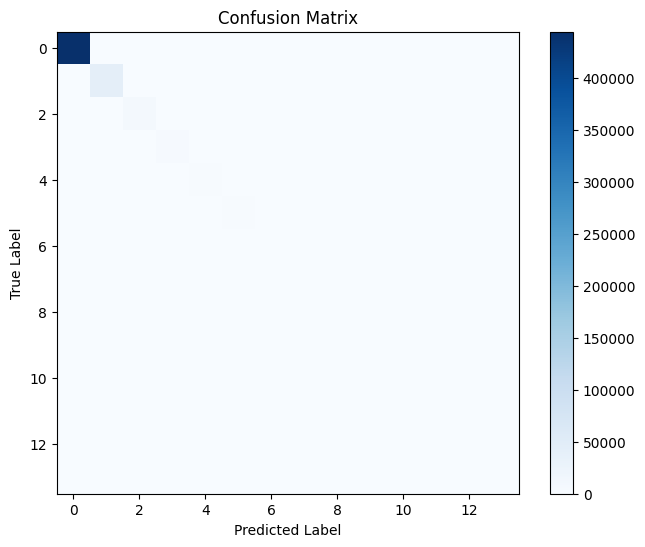

In [52]:
# Confusion Matrix
cm = confusion_matrix(labels, np.round(preds))
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [53]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(labels, preds)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

ValueError: multiclass format is not supported